In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics

In [2]:
#Importing the training dataset
dataset = pd.read_csv('Dataset_Train.csv')

In [3]:
'''LOGISTIC REGRESSION'''

'LOGISTIC REGRESSION'

In [4]:
'''We perform a feature selection'''

'We perform a feature selection'

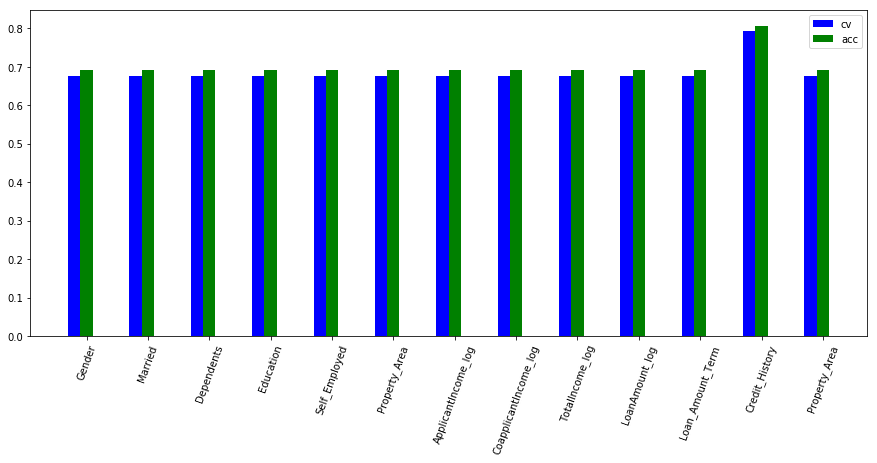

The attribute with the maximum accuracy is  Credit_History


In [5]:
#The Loan Status is the variable we want to predict
outcome = 'Loan_Status'

model = LogisticRegression(solver='lbfgs')

variables = ['Gender','Married','Dependents','Education','Self_Employed',
             'Property_Area','ApplicantIncome_log','CoapplicantIncome_log','TotalIncome_log','LoanAmount_log',
             'Loan_Amount_Term','Credit_History','Property_Area']

maxi = []
accuracy_train = []
cross_validation_score = []

for var in variables:
    
    predictors = [var]
    
    #Fit the model:
    model.fit(dataset[predictors],dataset[outcome])

    #Make predictions on training set:
    predictions = model.predict(dataset[predictors])

    accuracy_train.append(metrics.accuracy_score(predictions,dataset[outcome]))
    maxi.append(accuracy_train)
    
    #Perform k-fold cross-validation with 5 folds

    kf = KFold(n_splits=5)
    kf.get_n_splits(dataset)
    
    error = []
    CV = []
    for train, test in kf.split(dataset):
        # Filter training data
        train_predictors = (dataset[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = dataset[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(dataset[predictors].iloc[test,:], dataset[outcome].iloc[test]))
        
        CV.append(np.mean(error))
    
    cross_validation_score.append(np.mean(CV))


figure(figsize=(15, 6))
plt.xticks(np.arange(len(variables)),variables,rotation=70)
plt.bar(np.arange(len(variables))-0.2,cross_validation_score, width=0.2, color='b', align='center', label="cv")
plt.bar(np.arange(len(variables)),accuracy_train, width=0.2, color='g', align='center', label="acc")

plt.legend()

plt.savefig("Feature_Selection_logistic_1.jpg")

plt.show()

feature = variables[np.argmax(maxi)]
print("The attribute with the maximum accuracy is ",feature)

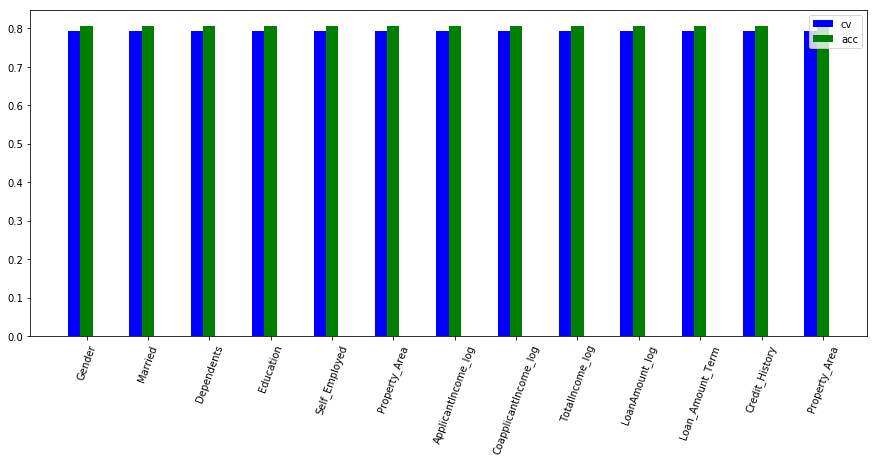

The attribute with the maximum accuracy is  Gender


In [6]:
#The second iteration of the feature selection
#We take into consideration the feature that scored the max accuracy 
# in the previous step

maxi = []
accuracy_train = []
cross_validation_score = []

for var in variables:
    
    predictors = [feature,var]
    
    #Fit the model:
    model.fit(dataset[predictors],dataset[outcome])

    #Make predictions on training set:
    predictions = model.predict(dataset[predictors])

    accuracy_train.append(metrics.accuracy_score(predictions,dataset[outcome]))
    maxi.append(accuracy_train)
    
    #Perform k-fold cross-validation with 5 folds

    kf = KFold(n_splits=5)
    kf.get_n_splits(dataset)
    
    error = []
    CV = []
    for train, test in kf.split(dataset):
        # Filter training data
        train_predictors = (dataset[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = dataset[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(dataset[predictors].iloc[test,:], dataset[outcome].iloc[test]))
        
        CV.append(np.mean(error))
    
    cross_validation_score.append(np.mean(CV))


figure(figsize=(15, 6))
plt.xticks(np.arange(len(variables)),variables,rotation=70)
plt.bar(np.arange(len(variables))-0.2,cross_validation_score, width=0.2, color='b', align='center', label="cv")
plt.bar(np.arange(len(variables)),accuracy_train, width=0.2, color='g', align='center', label="acc")

plt.legend()

plt.savefig("Feature_Selection_logistic_2.jpg")

plt.show()

feature = variables[np.argmax(maxi)]
print("The attribute with the maximum accuracy is ",feature)

In [7]:
#We can conclude that the credit history is the most dominant feature 
#Therefore, we shall use it for predicting the test data 

In [8]:
'''TEST DATA'''

'TEST DATA'

In [9]:
#Importing the training dataset
dataset = pd.read_csv('Dataset_Test.csv')

The Accuracy of the Test data is: 0.82


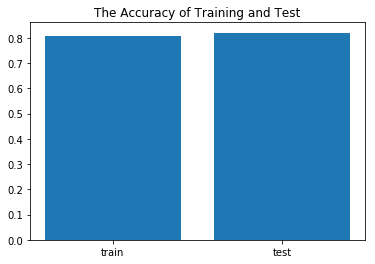

In [11]:
predictors = ["Credit_History"]
    
#Fit the model:
model.fit(dataset[predictors],dataset[outcome])

#Make predictions on training set:
predictions = model.predict(dataset[predictors])

accuracy_test = (metrics.accuracy_score(predictions,dataset[outcome]))

print("The Accuracy of the Test data is:", accuracy_test)


accuracy = [max(accuracy_train), accuracy_test]
data = ('train','test')

#Plot the bar chart showing number of Female and Male
plt.bar(np.arange(len(accuracy)), accuracy)
plt.title('The Accuracy of Training and Test')
plt.xticks(np.arange(len(accuracy)),data)
plt.savefig('accuracy_logistic.jpg')
plt.show()